<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>

<h2>INCLUSIVE YEAR 2019-2022</h2>

<H3>Analyst : Mark Anthony D. Trijo</H3>
<hr>

<h2>Data Preparation</h2>

<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h2>Data Frame</h2>
<hr>

In [2]:
accident = pd.read_csv('datasets//accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h3>Converting Data Field into DATE TIME data type</h3>

In [4]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = "coerce")

<h3>Converting Data Field into category data type</h3>

In [5]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [6]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Number_of_Casualties'] = accident['Number_of_Casualties'].astype('category')
accident['Number_of_Vehicles'] = accident['Number_of_Vehicles'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

<h3>Data Cleansing</h3>

In [7]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [8]:
accident['Accident Date'] = accident['Accident Date'].fillna(accident['Accident Date'].mean())
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [9]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [10]:
accident_per_year = accident['Year'].value_counts().sort_index()
accident_per_month = accident['Month'].value_counts().sort_index()

<h2>1. Accident Severity by Weather Conditions</h2>

In [11]:
accident_severity_by_weather = accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts()

In [12]:
accident_severity_by_weather

Weather_Conditions     Accident_Severity
Fine + high winds      Slight                 7134
                       Serious                1245
                       Fatal                   175
Fine no high winds     Slight               454521
                       Serious               73285
                       Fatal                  7207
Fog or mist            Slight                 2963
                       Serious                 483
                       Fatal                    82
Other                  Slight                15184
                       Serious                1801
                       Fatal                   165
Raining + high winds   Slight                 8209
                       Serious                1261
                       Fatal                   145
Raining no high winds  Slight                69380
                       Serious                9468
                       Fatal                   848
Snowing + high winds   Slight            

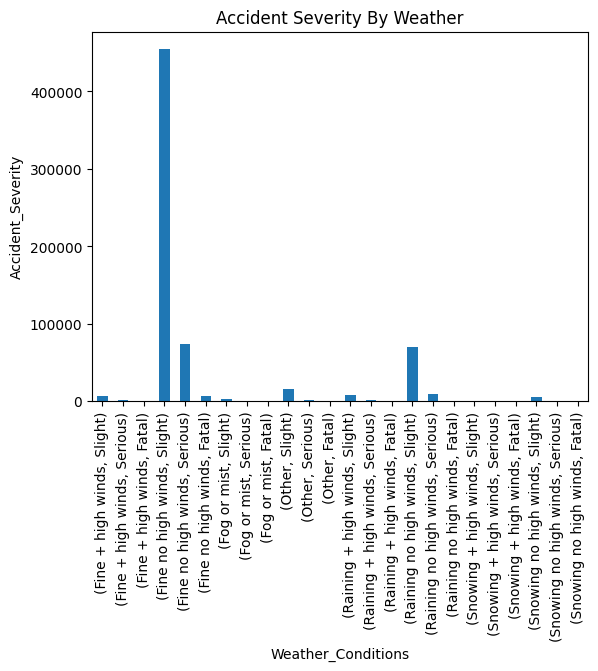

In [13]:
accident_severity_by_weather.plot(kind='bar')
plt.title('Accident Severity By Weather')
plt.xlabel('Weather_Conditions')
plt.ylabel('Accident_Severity')
plt.show()

<h2>2. Accident Severity by Time of Day
</h2>

In [14]:
accident['Hour'] = accident['Accident Date'].dt.hour
severity_by_hour = accident.groupby('Hour')['Accident_Severity'].value_counts()
severity_by_hour

Hour  Accident_Severity
0     Slight               226210
      Serious               35293
      Fatal                  3504
16    Slight               337591
      Serious               52924
      Fatal                  5157
Name: count, dtype: int64

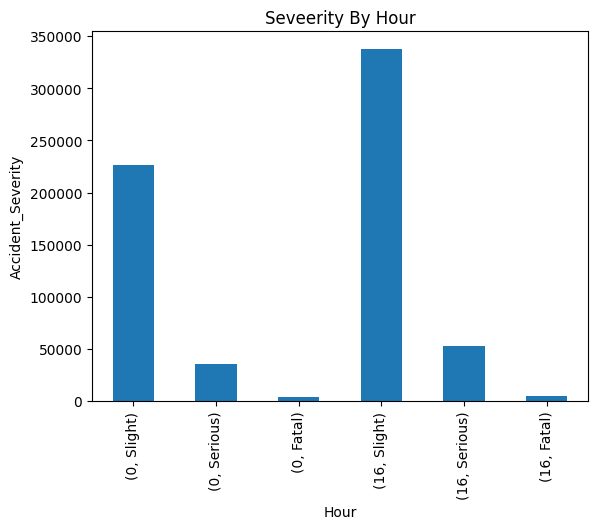

In [15]:
severity_by_hour.plot(kind='bar')
plt.title('Seveerity By Hour')
plt.xlabel('Hour')
plt.ylabel('Accident_Severity')
plt.show()

<h2>3. Accidents by Road Type
</h2>

In [16]:
accidents_by_road_type = accident.groupby('Road_Type').size()
accidents_by_road_type

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    496663
Slip road               7041
dtype: int64

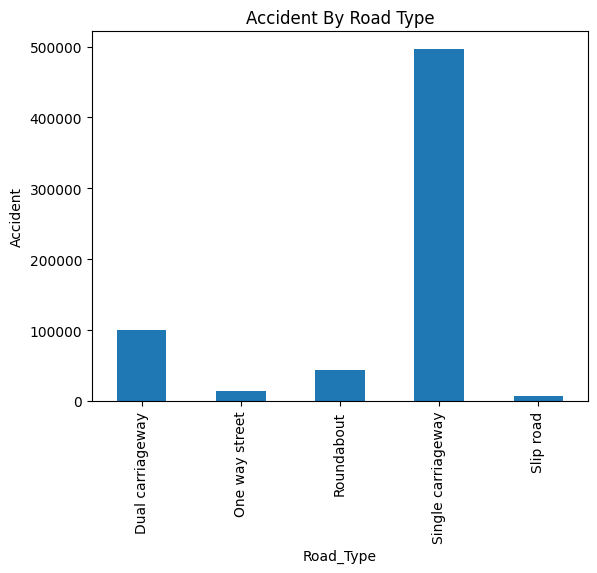

In [17]:
accidents_by_road_type.plot(kind='bar')
plt.title('Accident By Road Type')
plt.xlabel('Road_Type')
plt.ylabel('Accident')
plt.show()

<h2>4. Accidents by Urban or Rural Areas
</h2>

In [18]:
accidents_by_area = accident.groupby('Urban_or_Rural_Area').size()
accidents_by_area

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
dtype: int64

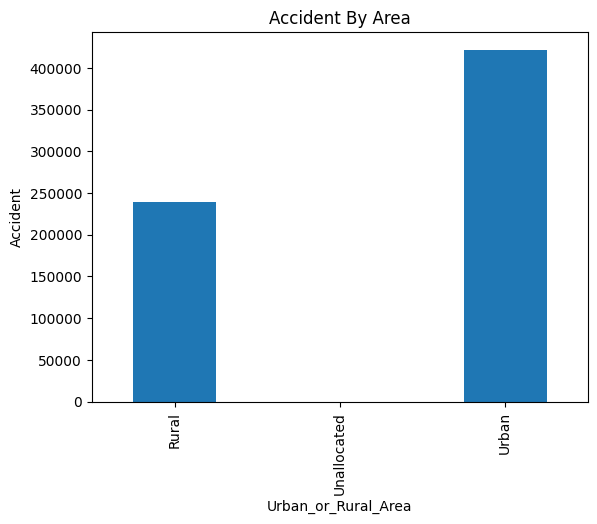

In [19]:
accidents_by_area.plot(kind='bar')
plt.title('Accident By Area')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Accident')
plt.show()

<h2>5. Number of Casualties vs. Accident Severity
</h2>

In [20]:
casualties_by_severity = accident.groupby('Accident_Severity')['Number_of_Casualties'].count()
casualties_by_severity

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
Name: Number_of_Casualties, dtype: int64

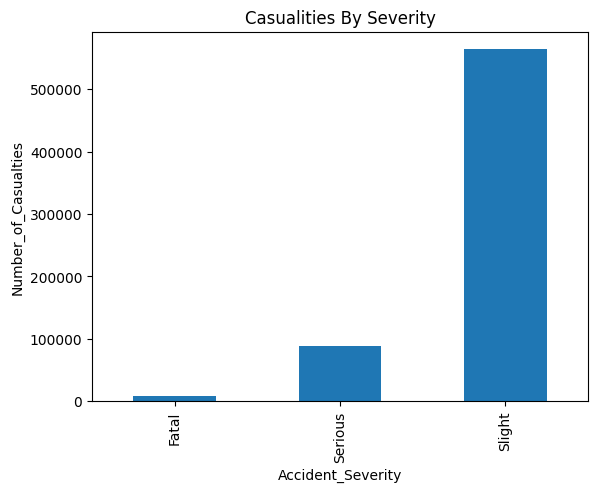

In [21]:
casualties_by_severity.plot(kind='bar')
plt.title('Casualities By Severity')
plt.xlabel('Accident_Severity')
plt.ylabel('Number_of_Casualties')
plt.show()

<h2>6. Accident Frequency by District Area
</h2>

In [22]:
accidents_by_district = accident.groupby('District Area').size()
accidents_by_district

District Area
Aberdeen City    1323
Aberdeenshire    1930
Adur              619
Allerdale        1128
Alnwick           232
                 ... 
Wychavon         1361
Wycombe          1729
Wyre             1238
Wyre Forest       969
York             1897
Length: 422, dtype: int64

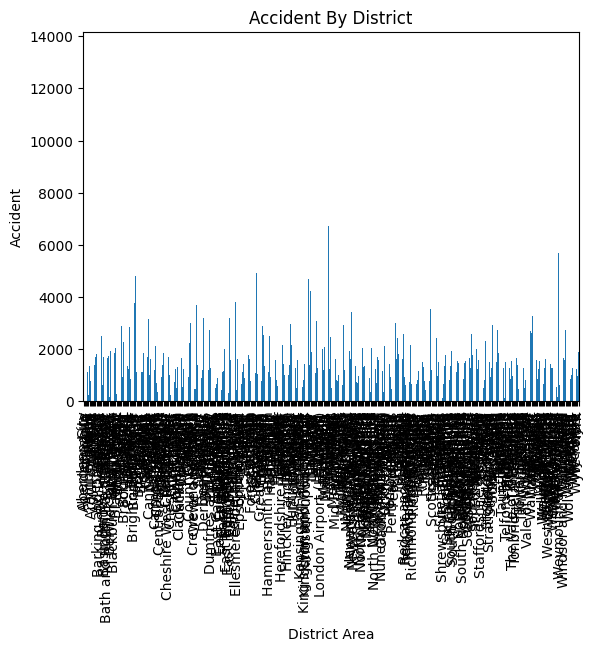

In [23]:
accidents_by_district.plot(kind='bar')
plt.title('Accident By District')
plt.xlabel('District Area')
plt.ylabel('Accident')
plt.show()

<h2>7. Vehicle Type vs. Accident Severity
</h2>

In [24]:
severity_by_vehicle_type = accident.groupby(['Vehicle_Type','Accident_Severity']).count()
severity_by_vehicle_type

Index  \
Vehicle_Type                          Accident_Severity           
Agricultural vehicle                  Fatal                  21   
                                      Serious               282   
                                      Slight               1644   
Bus or coach (17 or more pass seats)  Fatal                 325   
                                      Serious              3373   
                                      Slight              22180   
Car                                   Fatal                6577   
                                      Serious             66461   
                                      Slight             424954   
Data missing or out of range          Fatal                   0   
                                      Serious                 0   
                                      Slight                  6   
Goods 7.5 tonnes mgw and over         Fatal                 216   
                                      Serious              2321   
                                      Slight              14770   
Goods over 3.5t. and under 7.5t       Fatal                  67   
                                      Serious               857   
                                      Slight               5172   
Minibus (8 - 16 passenger seats)      Fatal                  29   
                                      Serious               276   
                                      Slight               1671   
Motorcycle 125cc and under            Fatal                 189   
                                      Serious              2031   
                                      Slight              13049   
Motorcycle 50cc and under             Fatal                  95   
                                      Serious              1014   
                                      Slight               6494   
Motorcycle over 125cc and up to 500cc Fatal                 105   
                                      Serious              1014   
                                      Slight               6537   
Motorcycle over 500cc                 Fatal                 339   
                                      Serious              3457   
                                      Slight              21861   
Other vehicle                         Fatal                  70   
                                      Serious               767   
                                      Slight               4800   
Pedal cycle                           Fatal                   6   
                                      Serious                39   
                                      Slight                152   
Ridden horse                          Fatal                   0   
                                      Serious                 0   
                                      Slight                  4   
Taxi/Private hire car                 Fatal                 155   
                                      Serious              1771   
                                      Slight              11368   
Van / Goods 3.5 tonnes mgw or under   Fatal                 467   
                                      Serious              4554   
                                      Slight              29139   

                                                         Accident Date  \
Vehicle_Type                          Accident_Severity                  
Agricultural vehicle                  Fatal                         21   
                                      Serious                      282   
                                      Slight                      1644   
Bus or coach (17 or more pass seats)  Fatal                        325   
                                      Serious                     3373   
                                      Slight                     22180   
Car                                   Fatal                       6577   
                                      Ser

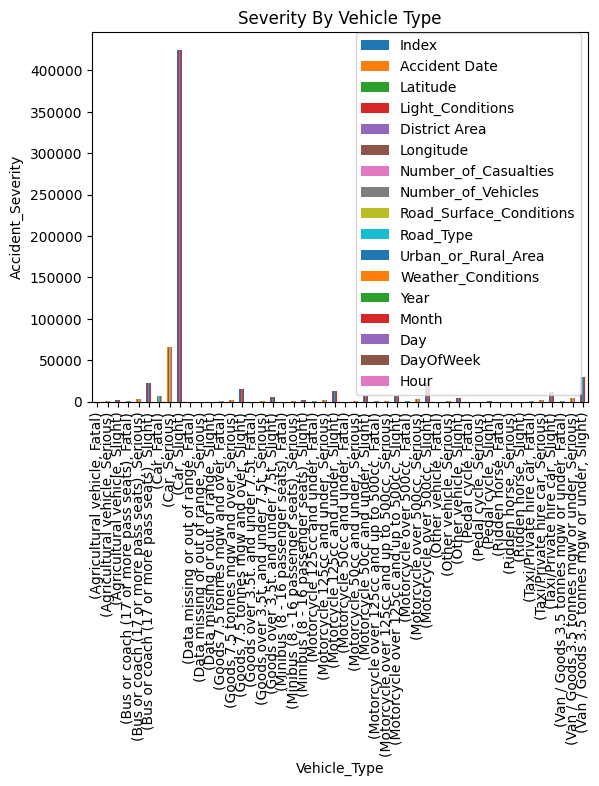

In [25]:
severity_by_vehicle_type.plot(kind='bar')
plt.title('Severity By Vehicle Type')
plt.xlabel('Vehicle_Type')
plt.ylabel('Accident_Severity')
plt.show()

<h2>8. Impact of Light Conditions on Accident Severity</h2>

In [26]:
accidents_by_light_condition = accident.groupby(['Light_Conditions','Accident_Severity']).count()
accidents_by_light_condition

Index  Accident Date  \
Light_Conditions            Accident_Severity                          
Darkness - lighting unknown Fatal                  68             68   
                            Serious               794            794   
                            Slight               5622           5622   
Darkness - lights lit       Fatal                1860           1860   
                            Serious             19130          19130   
                            Slight             108345         108345   
Darkness - lights unlit     Fatal                  45             45   
                            Serious               360            360   
                            Slight               2138           2138   
Darkness - no lighting      Fatal                1612           1612   
                            Serious              7174           7174   
                            Slight              28651          28651   
Daylight                    Fatal                5076           5076   
                            Serious             60759          60759   
                            Slight             419045         419045   

                                               Latitude  District Area  \
Light_Conditions            Accident_Severity                            
Darkness - lighting unknown Fatal                    68             68   
                            Serious                 794            794   
                            Slight                 5622           5622   
Darkness - lights lit       Fatal                  1860           1860   
                            Serious               19130          19130   
                            Slight               108345         108345   
Darkness - lights unlit     Fatal                    45             45   
                            Serious                 360            360   
                            Slight                 2138           2138   
Darkness - no lighting      Fatal                  1612           1612   
                            Serious                7174           7174   
                            Slight                28651          28651   
Daylight                    Fatal                  5076           5076   
                            Serious               60759          60759   
                            Slight               419045         419045   

                                               Longitude  \
Light_Conditions            Accident_Severity              
Darkness - lighting unknown Fatal                     68   
                            Serious                  794   
                            Slight                  5622   
Darkness - lights lit       Fatal                   1860   
                            Serious                19130   
                            Slight                108345   
Darkness - lights unlit     Fatal                     45   
                            Serious                  360   
                            Slight                  2138   
Darkness - no lighting      Fatal                   1612   
                            Serious                 7174   
                            Slight                 28651   
Daylight                    Fatal                   5076   
                            Serious                60759   
                            Slight                419045   

                                               Number_of_Casualties  \
Light_Conditions            Accident_Severity                         
Darkness - lighting unknown Fatal                                68   
                            Serious                             794   
                            Slight                             5622   
Darkness - lights lit       Fatal                              1860   
                            Serious                           19130   
                            Slight            

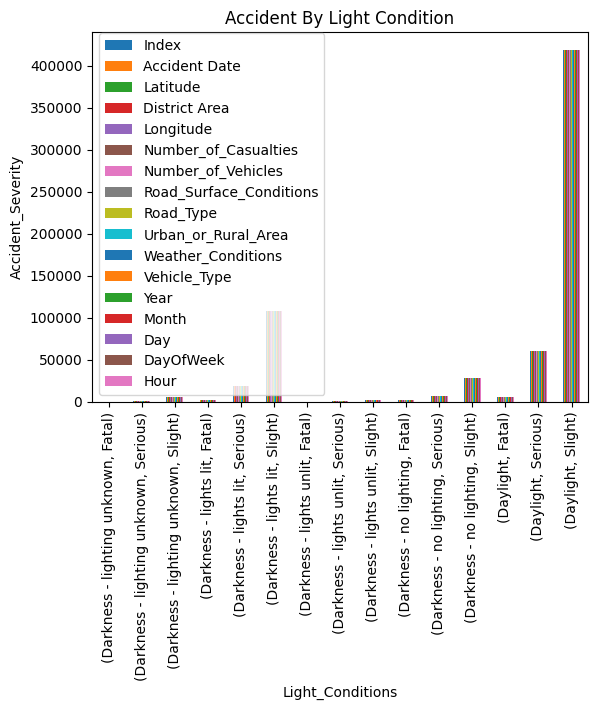

In [27]:
accidents_by_light_condition.plot(kind='bar')
plt.title('Accident By Light Condition')
plt.xlabel('Light_Conditions')
plt.ylabel('Accident_Severity')
plt.show()

<h2>9. Number of Vehicles Involved in Accidents by Severity
</h2>

In [28]:
accidents_by_vehicles_severity = accident.groupby(['Number_of_Vehicles', 'Accident_Severity']).size()
accidents_by_vehicles_severity

Number_of_Vehicles  Accident_Severity
1                   Fatal                  3885
                    Serious               38940
                    Slight               157962
2                   Fatal                  3467
                    Serious               41578
                    Slight               346950
3                   Fatal                   900
                    Serious                5808
                    Slight                46098
4                   Fatal                   272
                    Serious                1340
                    Slight                 9688
5                   Fatal                    70
                    Serious                 326
                    Slight                 2068
6                   Fatal                    28
                    Serious                 121
                    Slight                  609
7                   Fatal                    17
                    Serious                  63
  

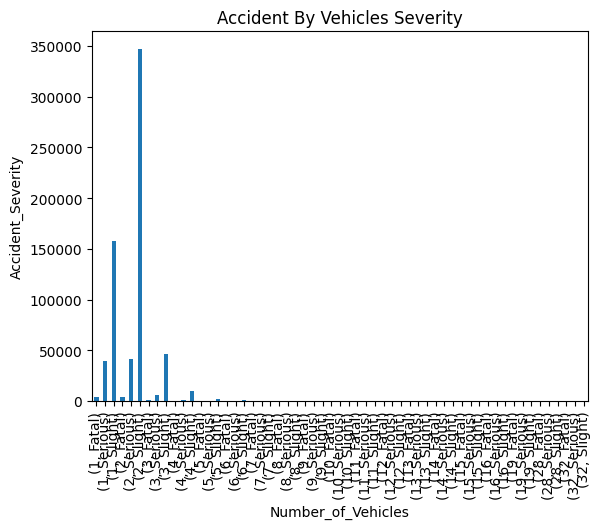

In [29]:
accidents_by_vehicles_severity.plot(kind='bar')
plt.title('Accident By Vehicles Severity')
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Accident_Severity')
plt.show()

<h2>10.Impact of Road Surface Conditions on Accident Frequency</h2>

In [30]:
accidents_by_surface_condition = accident.groupby('Road_Surface_Conditions').size()
accidents_by_surface_condition

Road_Surface_Conditions
Dry                     448547
Flood over 3cm. deep      1017
Frost or ice             18517
Snow                      5890
Wet or damp             186708
dtype: int64

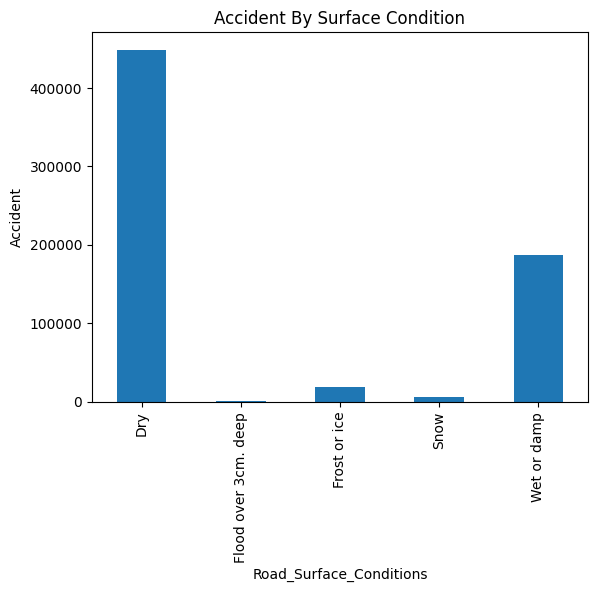

In [31]:
accidents_by_surface_condition.plot(kind='bar')
plt.title('Accident By Surface Condition')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Accident')
plt.show()

<h2>11.Weather Conditions and Number of Casualties</h2>

In [32]:
casualties_by_weather = accident.groupby(['Weather_Conditions'])['Number_of_Casualties'].count()
casualties_by_weather

Weather_Conditions
Fine + high winds          8554
Fine no high winds       535013
Fog or mist                3528
Other                     17150
Raining + high winds       9615
Raining no high winds     79696
Snowing + high winds        885
Snowing no high winds      6238
Name: Number_of_Casualties, dtype: int64

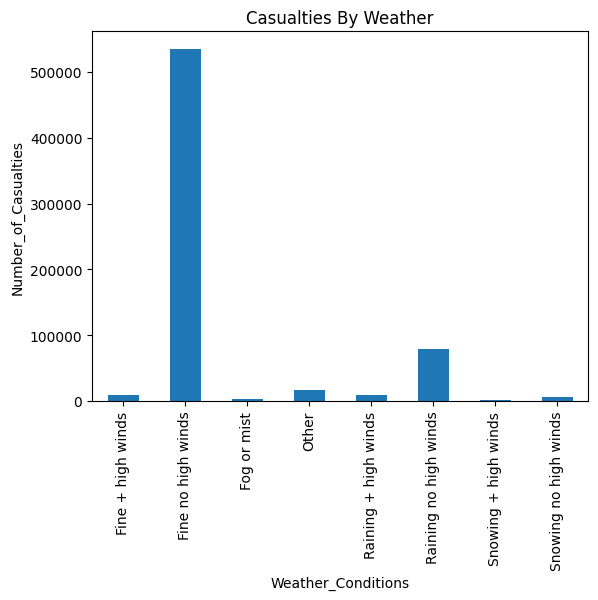

In [33]:
casualties_by_weather.plot(kind='bar')
plt.title('Casualties By Weather')
plt.xlabel('Weather_Conditions')
plt.ylabel('Number_of_Casualties')
plt.show()

<h2>12.Accidents by Road Surface and Accident Severity</h2>

In [34]:
accidents_by_surface_severity = accident.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size()
accidents_by_surface_severity

Road_Surface_Conditions  Accident_Severity
Dry                      Fatal                  5790
                         Serious               61708
                         Slight               381049
Flood over 3cm. deep     Fatal                    23
                         Serious                 152
                         Slight                  842
Frost or ice             Fatal                   193
                         Serious                2007
                         Slight                16317
Snow                     Fatal                    35
                         Serious                 565
                         Slight                 5290
Wet or damp              Fatal                  2620
                         Serious               23785
                         Slight               160303
dtype: int64

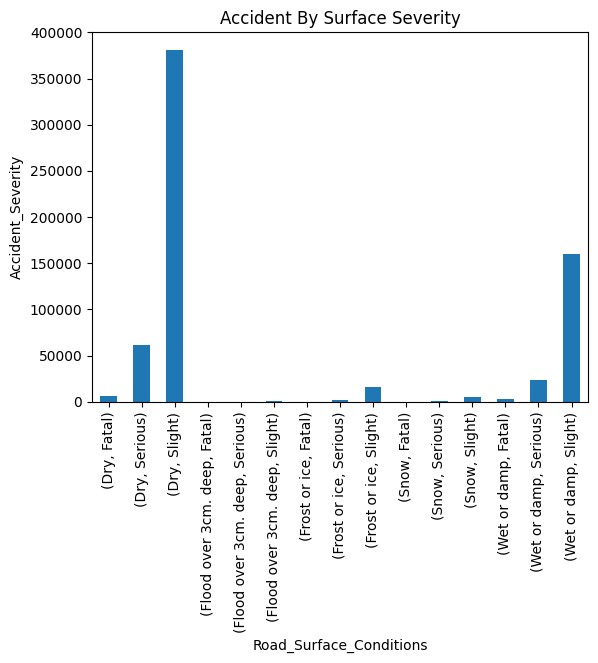

In [35]:
accidents_by_surface_severity.plot(kind='bar')
plt.title('Accident By Surface Severity')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Accident_Severity')
plt.show()

<h2>13.Casualties by Road Type</h2>

In [36]:
casualties_by_road_type = accident.groupby('Road_Type')['Number_of_Casualties'].count()
casualties_by_road_type

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    496663
Slip road               7041
Name: Number_of_Casualties, dtype: int64

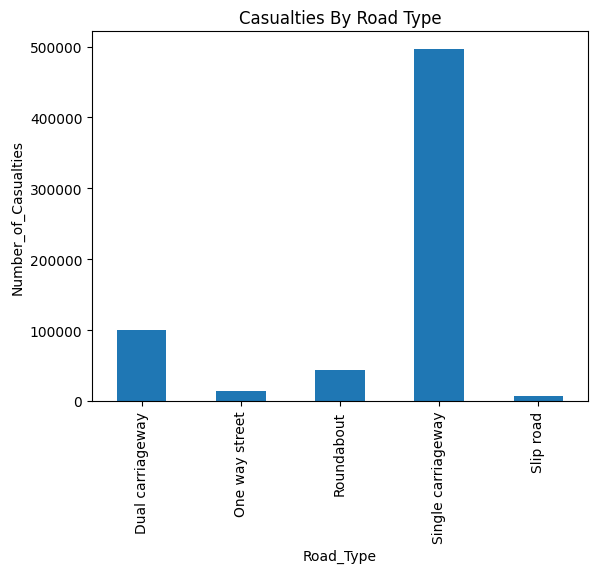

In [37]:
casualties_by_road_type.plot(kind='bar')
plt.title('Casualties By Road Type')
plt.xlabel('Road_Type')
plt.ylabel('Number_of_Casualties')
plt.show()

<h2>14.Accidents by Weather and Light Conditions</h2>

In [38]:
accidents_by_weather_light = accident.groupby(['Weather_Conditions', 'Light_Conditions']).size()
accidents_by_weather_light

Weather_Conditions     Light_Conditions           
Fine + high winds      Darkness - lighting unknown        59
                       Darkness - lights lit            1852
                       Darkness - lights unlit            51
                       Darkness - no lighting            796
                       Daylight                         5796
Fine no high winds     Darkness - lighting unknown      5333
                       Darkness - lights lit           93958
                       Darkness - lights unlit          1745
                       Darkness - no lighting          25251
                       Daylight                       408726
Fog or mist            Darkness - lighting unknown        65
                       Darkness - lights lit             921
                       Darkness - lights unlit            37
                       Darkness - no lighting            862
                       Daylight                         1643
Other                  Darkness - 

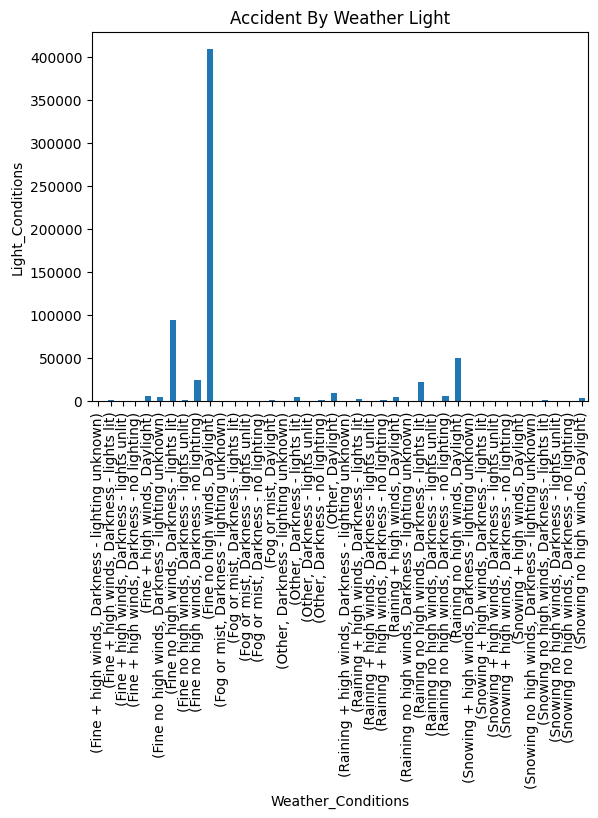

In [39]:
accidents_by_weather_light.plot(kind='bar')
plt.title('Accident By Weather Light')
plt.xlabel('Weather_Conditions')
plt.ylabel('Light_Conditions')
plt.show()

<h2>15.Accidents by Urban or Rural Areas and Road Type</h2>

In [40]:
accidents_by_area_road_type = accident.groupby(['Urban_or_Rural_Area', 'Road_Type']).size()
accidents_by_area_road_type

Urban_or_Rural_Area  Road_Type         
Rural                Dual carriageway       48715
                     One way street          1193
                     Roundabout             15545
                     Single carriageway    169243
                     Slip road               4294
Unallocated          Dual carriageway           1
                     One way street             0
                     Roundabout                 1
                     Single carriageway         9
                     Slip road                  0
Urban                Dual carriageway       50708
                     One way street         12366
                     Roundabout             28446
                     Single carriageway    327411
                     Slip road               2747
dtype: int64

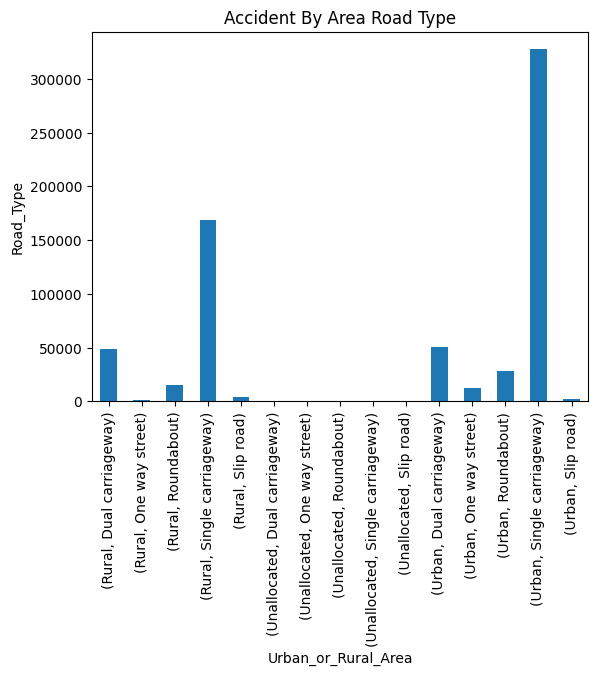

In [41]:
accidents_by_area_road_type.plot(kind='bar')
plt.title('Accident By Area Road Type')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Road_Type')
plt.show()

<h2>16.Correlation Between Vehicle Type and Road Type</h2>

In [42]:
vehicle_by_road_type = accident.groupby(['Vehicle_Type', 'Road_Type']).size()
vehicle_by_road_type

Vehicle_Type                         Road_Type         
Agricultural vehicle                 Dual carriageway        293
                                     One way street           49
                                     Roundabout              129
                                     Single carriageway     1449
                                     Slip road                27
                                                           ...  
Van / Goods 3.5 tonnes mgw or under  Dual carriageway       5107
                                     One way street          723
                                     Roundabout             2294
                                     Single carriageway    25675
                                     Slip road               361
Length: 80, dtype: int64

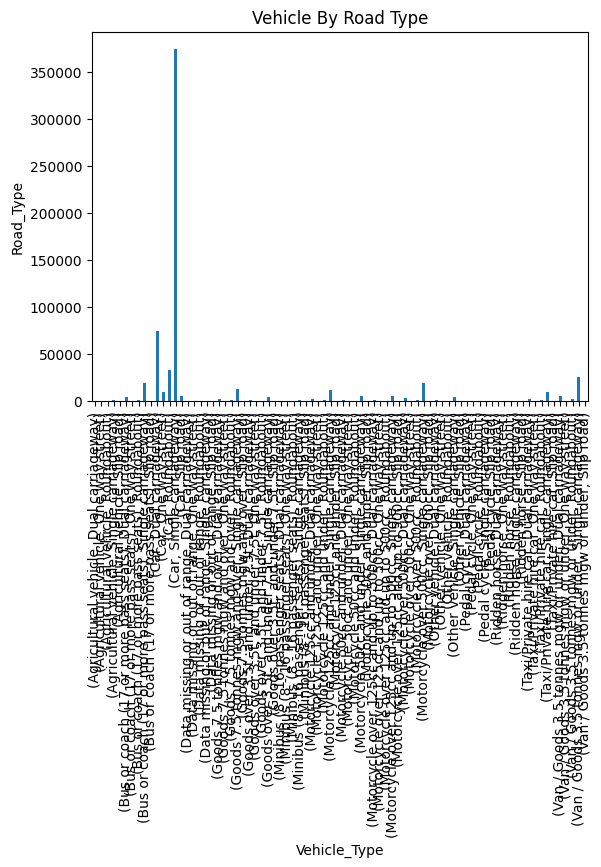

In [43]:
vehicle_by_road_type.plot(kind='bar')
plt.title('Vehicle By Road Type')
plt.xlabel('Vehicle_Type')
plt.ylabel('Road_Type')
plt.show()

<h2>16.Number of Accidents per Vehicle Type in Urban vs Rural Areas</h2>

In [44]:
accidents_by_vehicle_area = accident.groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).size()
accidents_by_vehicle_area

Vehicle_Type                           Urban_or_Rural_Area
Agricultural vehicle                   Rural                     675
                                       Unallocated                 0
                                       Urban                    1272
Bus or coach (17 or more pass seats)   Rural                    9025
                                       Unallocated                 2
                                       Urban                   16851
Car                                    Rural                  181922
                                       Unallocated                 8
                                       Urban                  316062
Data missing or out of range           Rural                       0
                                       Unallocated                 0
                                       Urban                       6
Goods 7.5 tonnes mgw and over          Rural                    6156
                                       Unall

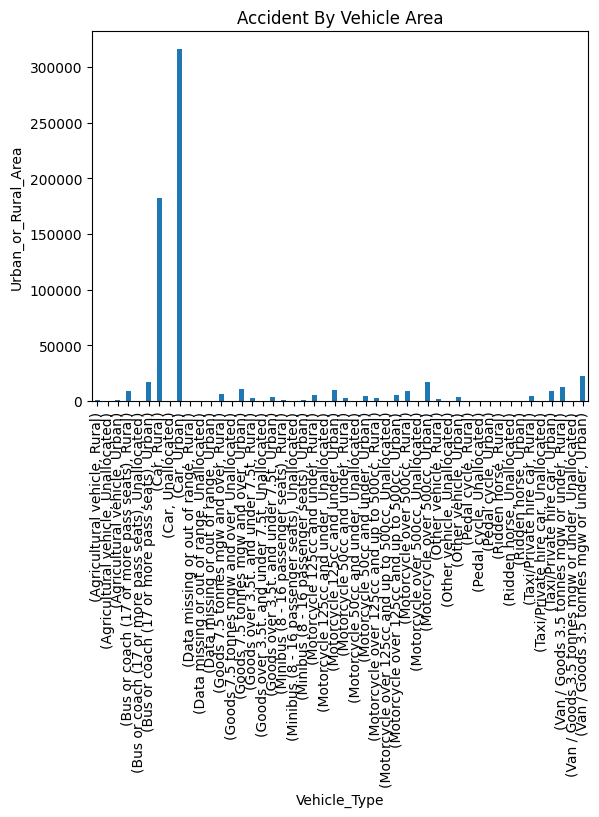

In [45]:
accidents_by_vehicle_area.plot(kind='bar')
plt.title('Accident By Vehicle Area')
plt.xlabel('Vehicle_Type')
plt.ylabel('Urban_or_Rural_Area')
plt.show()

<h2>17.Total Number of Accidents by Severity</h2>

In [46]:
accident_severity_count = accident['Accident_Severity'].value_counts()
accident_severity_count

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

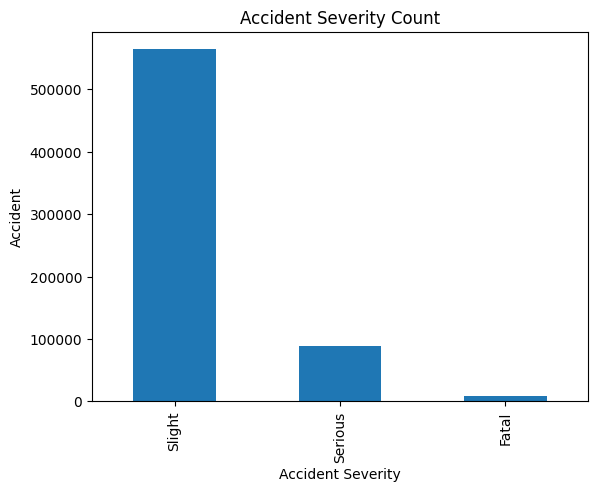

In [47]:
accident_severity_count.plot(kind='bar')
plt.title('Accident Severity Count')
plt.xlabel('Accident Severity')
plt.ylabel('Accident')
plt.show()

<h2>18.Total Number of Accidents by Light Conditions</h2>

In [48]:
light_conditions_count = accident['Light_Conditions'].value_counts()
light_conditions_count


Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

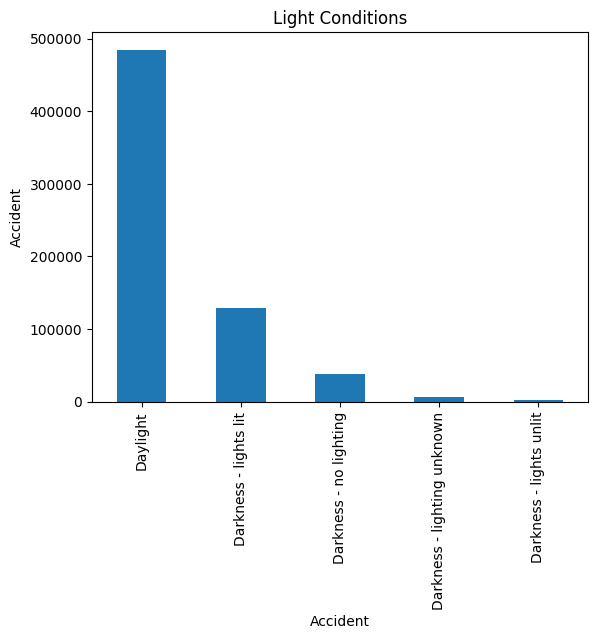

In [49]:
light_conditions_count.plot(kind='bar')
plt.title('Light Conditions')
plt.xlabel('Accident')
plt.ylabel('Accident')
plt.show()

<h2>19.Accidents by Time of Day (Hour)</h2>

In [50]:
accidents_by_hour = accident['Hour'].value_counts().sort_index()
accidents_by_hour


Hour
0     265007
16    395672
Name: count, dtype: int64

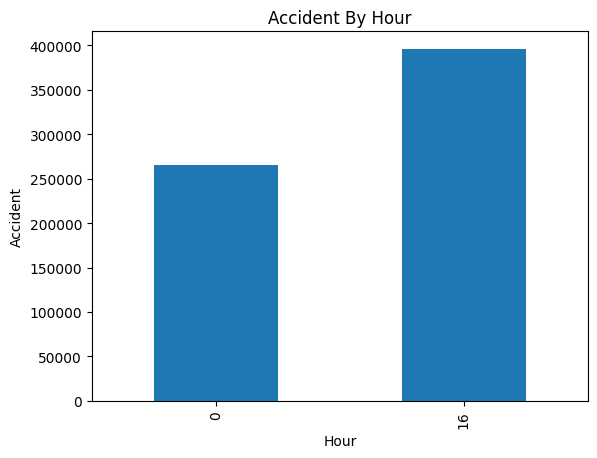

In [51]:
accidents_by_hour.plot(kind='bar')
plt.title('Accident By Hour')
plt.xlabel('Hour')
plt.ylabel('Accident')
plt.show()

<h2>20.Distribution of Accidents by Weather Conditions</h2>

In [52]:
weather_conditions_count = accident['Weather_Conditions'].value_counts()
weather_conditions_count


Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

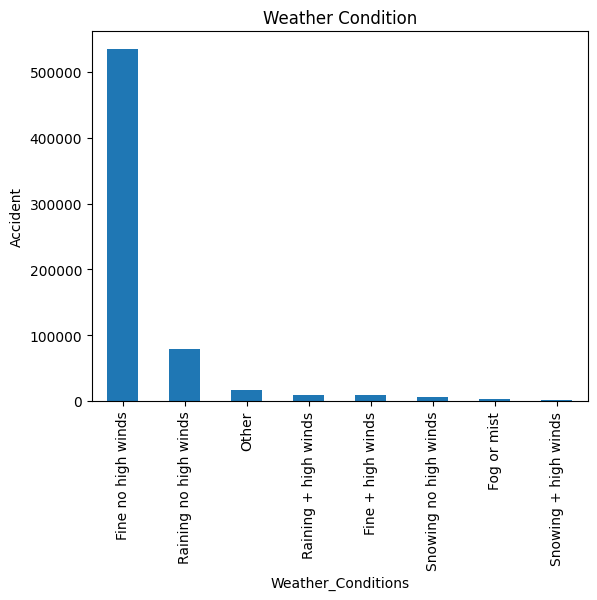

In [53]:
weather_conditions_count.plot(kind='bar')
plt.title('Weather Condition')
plt.xlabel('Weather_Conditions')
plt.ylabel('Accident')
plt.show()

<h1>Seasonal Analysis</h1>

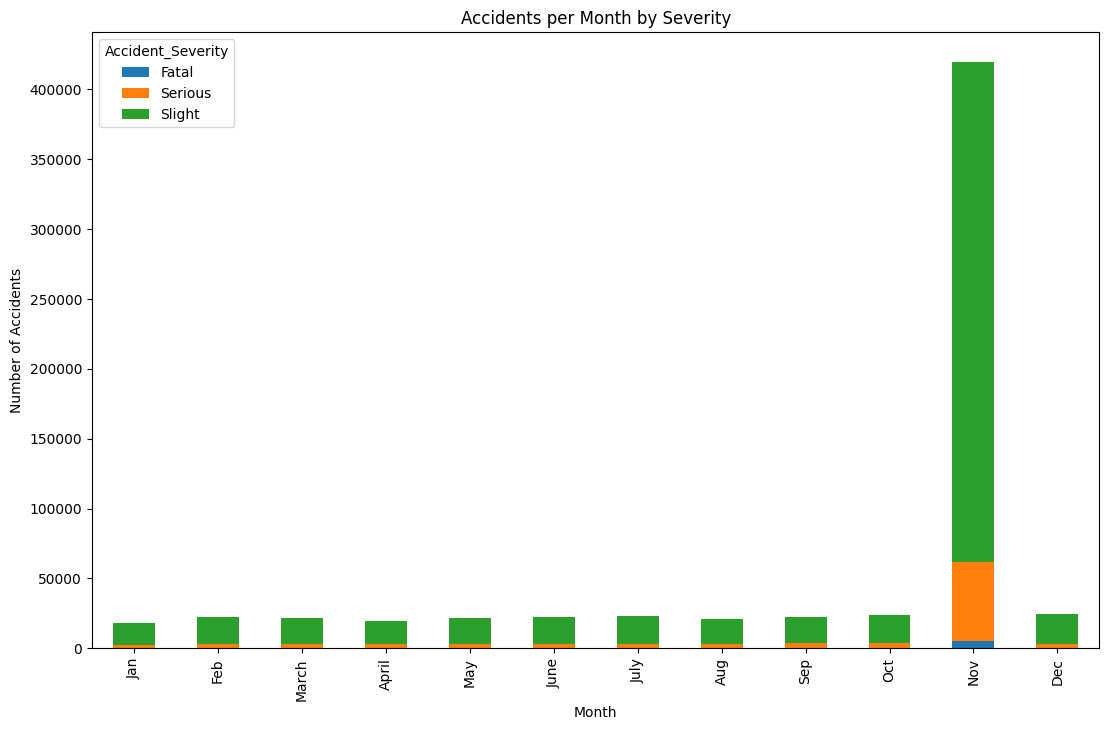

In [54]:
accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

months_name = {
    1:"Jan", 2:"Feb", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"
}

accidents_per_month_severity.index = accidents_per_month_severity.index.map(months_name)
accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()


<h1>Line Plot</h1>

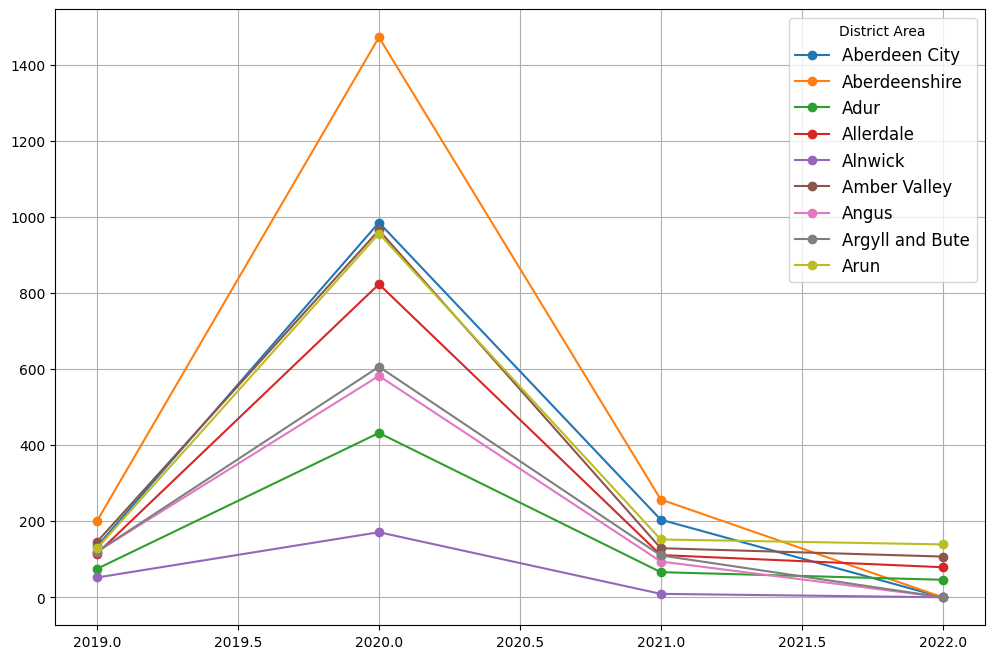

In [55]:
accidents_per_area = accident.groupby(['Year', 'District Area']).size().reset_index(name='Accident_Count')
accidents_per_area

pivot_data = accidents_per_area.pivot(index='Year', columns='District Area', values='Accident_Count')
pivot_data

count = 21
for x in accidents_per_area['District Area']:
    count += 1
    plt.plot(pivot_data.index, pivot_data[x], label=x, marker='o')
    if count == 30:
        break

plt.gcf().set_size_inches(12,8)
plt.legend(title='District Area', fontsize=12)
plt.grid()
plt.show()

<h1>Correlation with Visualization</h1>

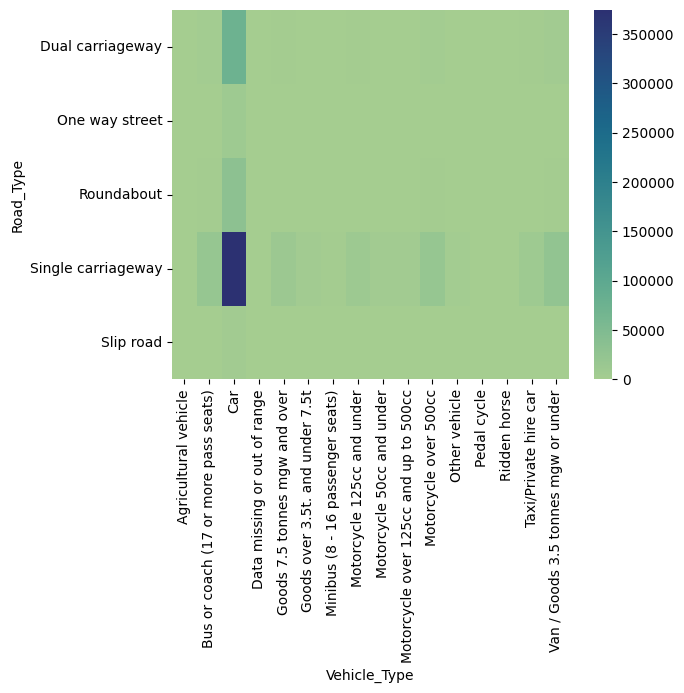

In [57]:
surface_vehicle = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(surface_vehicle, cmap="crest")
plt.show()


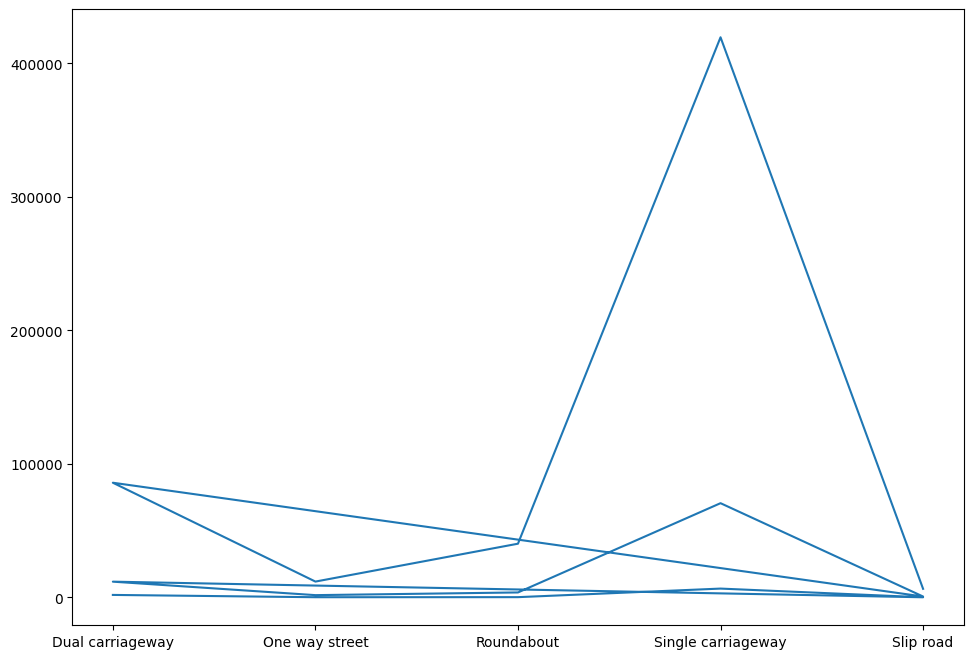

In [86]:
# accident.columns

# Accident_Severity
# Road_Type

acc_rt = accident.groupby(['Accident_Severity','Road_Type']).size().reset_index(name='Accident_Count')

ar_pivot = acc_rt.pivot(index='Road_Type', columns='Accident_Severity',values='Accident_Count')
ar_pivot

road_types={
    1:"Dual carriageway",2:"One way street",3:"Roundabout", 4:"Single carriageway", 5:"Slip road"
}
ar_pivot.index= ar_pivot.index.map(road_types)

plt.plot(acc_rt['Road_Type'],acc_rt['Accident_Count'])
plt.gcf().set_size_inches(11.5,8)
plt.show()

In [74]:
accident['Road_Type']

0         Single carriageway
1         Single carriageway
2         Single carriageway
3         Single carriageway
4         Single carriageway
                 ...        
660674    Single carriageway
660675    Single carriageway
660676    Single carriageway
660677    Single carriageway
660678      Dual carriageway
Name: Road_Type, Length: 660679, dtype: category
Categories (5, object): ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road']

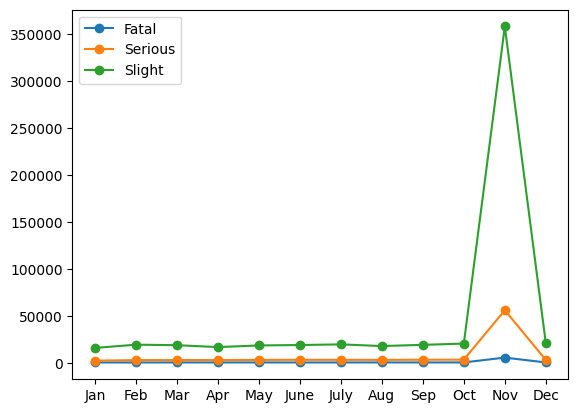

In [75]:
sev_year = accident.groupby(['Accident_Severity','Month']).size().reset_index(name='Accident_Count')

sy_pivot = sev_year.pivot(index= 'Month', columns='Accident_Severity', values='Accident_Count')

month_names = {
    1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"
}
sy_pivot.index = sy_pivot.index.map(month_names)

plt.plot(sy_pivot.index, sy_pivot['Fatal'], label='Fatal',marker='o')
plt.plot(sy_pivot.index, sy_pivot['Serious'], label='Serious',marker='o')
plt.plot(sy_pivot.index, sy_pivot['Slight'], label='Slight',marker='o')
plt.legend()

plt.show()

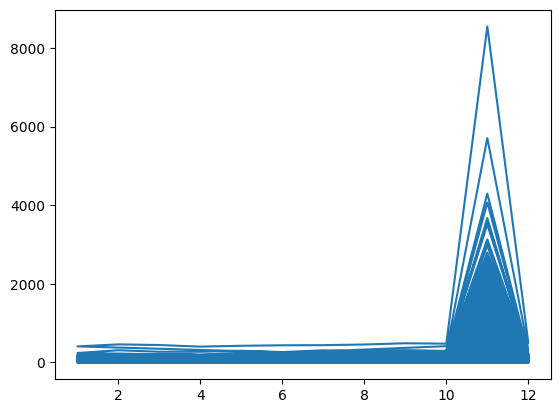

In [105]:
# accident.columns
# District Area
# Month

da_year = accident.groupby(['District Area','Month']).size().reset_index(name='Accident_Count')

dy_pivot = da_year.pivot(index='District Area', columns='Month', values='Accident_Count')

month_names = {
    1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"
}
sy_pivot.index = sy_pivot.index.map(month_names)



plt.plot(da_year['Month'], da_year['Accident_Count'])
plt.show()

In [103]:
accident['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: category
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']